In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor

c:\Users\mdiallo\AppData\Local\anaconda3\envs\autogluon\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
#path_ehcvm = "D:/Shares/DMCI/Output_ehcvm/EHCVM Base améliorée 1.1"

In [49]:
train = pd.read_csv("Train_rur_V1.1.csv")

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559 entries, 0 to 2558
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_hhsize              2559 non-null   float64
 1   region                  2559 non-null   int64  
 2   fer_electrique          2559 non-null   int64  
 3   fer_charbon             2559 non-null   int64  
 4   bonbonne_gaz            2559 non-null   int64  
 5   ventilo                 2559 non-null   int64  
 6   voiture                 2559 non-null   int64  
 7   ordinateur              2559 non-null   int64  
 8   frigo                   2559 non-null   int64  
 9   type_logement           2559 non-null   int64  
 10  statut_occup            2559 non-null   int64  
 11  eclairage               2558 non-null   float64
 12  materiau_toit           2559 non-null   int64  
 13  nature_sol              2559 non-null   int64  
 14  source_eau_ss           2559 non-null   

In [51]:
train.head()

,log_hhsize,region,fer_electrique,fer_charbon,bonbonne_gaz,ventilo,voiture,ordinateur,frigo,type_logement,...,sexe,mode_evac_ordure,type_sanitaire,partage_sanitaire,excrement_hors_concess,evac_eau_usees,milieu,pauvre,hhid,source
0,2.197225,14,2,2,2,2,2,2,2,2,...,1,3,2,2,NaN,4,2.0,1,59811.0,2
1,1.945910,14,2,1,2,2,2,2,2,2,...,1,5,2,2,2.0,4,2.0,1,59809.0,2
2,2.484907,14,2,1,1,2,2,2,2,2,...,1,3,2,2,NaN,3,2.0,0,59808.0,2
3,2.079442,14,2,2,2,2,2,2,2,2,...,2,5,2,2,4.0,3,2.0,1,59807.0,2
4,1.609438,14,2,2,2,2,2,2,2,2,...,1,3,2,1,2.0,4,2.0,0,59806.0,2


In [52]:
train.set_index("hhid", inplace=True)

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2559 entries, 59811.0 to 6601.0
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_hhsize              2559 non-null   float64
 1   region                  2559 non-null   int64  
 2   fer_electrique          2559 non-null   int64  
 3   fer_charbon             2559 non-null   int64  
 4   bonbonne_gaz            2559 non-null   int64  
 5   ventilo                 2559 non-null   int64  
 6   voiture                 2559 non-null   int64  
 7   ordinateur              2559 non-null   int64  
 8   frigo                   2559 non-null   int64  
 9   type_logement           2559 non-null   int64  
 10  statut_occup            2559 non-null   int64  
 11  eclairage               2558 non-null   float64
 12  materiau_toit           2559 non-null   int64  
 13  nature_sol              2559 non-null   int64  
 14  source_eau_ss           2559 non-null

In [54]:
train.describe(include="all")

,log_hhsize,region,fer_electrique,fer_charbon,bonbonne_gaz,ventilo,voiture,ordinateur,frigo,type_logement,...,educ_hi,sexe,mode_evac_ordure,type_sanitaire,partage_sanitaire,excrement_hors_concess,evac_eau_usees,milieu,pauvre,source
count,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,...,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2010.000000,2559.000000,2559.0,2559.000000,2559.0
mean,2.097273,7.638921,1.991794,1.641657,1.654553,1.766315,1.985932,1.982024,1.855021,2.420868,...,1.562720,1.207894,3.648691,1.996092,1.885111,2.501990,3.646346,2.0,0.472841,2.0
std,0.591834,3.849513,0.090234,0.479607,0.475607,0.423257,0.117794,0.132889,0.352148,0.873045,...,1.360058,0.405880,1.615645,0.904761,0.318950,1.260593,0.804343,0.0,0.499359,0.0
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0,0.000000,2.0
25%,1.791759,4.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,4.000000,2.0,0.000000,2.0
50%,2.079442,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,5.000000,2.000000,2.000000,2.000000,4.000000,2.0,0.000000,2.0
75%,2.484907,11.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.0,1.000000,2.0
max,3.637586,14.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,...,9.000000,2.000000,6.000000,5.000000,2.000000,5.000000,5.000000,2.0,1.000000,2.0


In [55]:
train.isna().sum()

log_hhsize                  0
region                      0
fer_electrique              0
fer_charbon                 0
bonbonne_gaz                0
ventilo                     0
voiture                     0
ordinateur                  0
frigo                       0
type_logement               0
statut_occup                0
eclairage                   1
materiau_toit               0
nature_sol                  0
source_eau_ss               0
materiau_mur                0
tx_promiscuite              0
dem_emp_rate                0
activ12m                    0
age                         0
educ_hi                     0
sexe                        0
mode_evac_ordure            0
type_sanitaire              0
partage_sanitaire           0
excrement_hors_concess    549
evac_eau_usees              0
milieu                      0
pauvre                      0
source                      0
dtype: int64

In [56]:
#train["pauvre"] = train["pauvre"].astype("int").apply(lambda x : 1 if x==2 else 0)

In [57]:
train.pauvre.value_counts(dropna=False)

pauvre
0    1349
1    1210
Name: count, dtype: int64

In [58]:
test = pd.read_csv("Test_rur_V1.1.csv")

In [59]:
test.set_index("hhid", inplace=True)

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 59812.0 to 6609.0
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_hhsize              639 non-null    float64
 1   region                  639 non-null    int64  
 2   fer_electrique          639 non-null    int64  
 3   fer_charbon             639 non-null    int64  
 4   bonbonne_gaz            639 non-null    int64  
 5   ventilo                 639 non-null    int64  
 6   voiture                 639 non-null    int64  
 7   ordinateur              639 non-null    int64  
 8   frigo                   639 non-null    int64  
 9   type_logement           639 non-null    int64  
 10  statut_occup            639 non-null    int64  
 11  eclairage               639 non-null    int64  
 12  materiau_toit           639 non-null    int64  
 13  nature_sol              639 non-null    int64  
 14  source_eau_ss           639 non-null  

In [61]:
test.isna().sum()

log_hhsize                  0
region                      0
fer_electrique              0
fer_charbon                 0
bonbonne_gaz                0
ventilo                     0
voiture                     0
ordinateur                  0
frigo                       0
type_logement               0
statut_occup                0
eclairage                   0
materiau_toit               0
nature_sol                  0
source_eau_ss               0
materiau_mur                0
tx_promiscuite              0
dem_emp_rate                0
activ12m                    0
age                         0
educ_hi                     0
sexe                        0
mode_evac_ordure            0
type_sanitaire              0
partage_sanitaire           0
excrement_hors_concess    140
evac_eau_usees              0
milieu                      0
pauvre                      0
source                      0
dtype: int64

In [62]:
#test["pauvre"] = test["pauvre"].astype("int").apply(lambda x : 1 if x==2 else 0)

In [63]:
test.pauvre.value_counts()

pauvre
0    337
1    302
Name: count, dtype: int64

In [64]:
#data = data.drop(columns = ["hhid","moutons_n", "chevres_n"], axis=1)

In [65]:
#train["age_2"] = train["age"]**2

In [66]:
#test["age_2"] = test["age"]**2

In [67]:
#test.to_csv(path_ehcvm+"/new_test_rrl.csv")

In [68]:
eh_col = train.columns.to_list()

In [69]:
eh_col

['log_hhsize',
 'region',
 'fer_electrique',
 'fer_charbon',
 'bonbonne_gaz',
 'ventilo',
 'voiture',
 'ordinateur',
 'frigo',
 'type_logement',
 'statut_occup',
 'eclairage',
 'materiau_toit',
 'nature_sol',
 'source_eau_ss',
 'materiau_mur',
 'tx_promiscuite',
 'dem_emp_rate',
 'activ12m',
 'age',
 'educ_hi',
 'sexe',
 'mode_evac_ordure',
 'type_sanitaire',
 'partage_sanitaire',
 'excrement_hors_concess',
 'evac_eau_usees',
 'milieu',
 'pauvre',
 'source']

In [70]:
### data.head()
# columns from sensus data 
rg_col = [ 'ventilo', 'bonbonne_gaz', 'indiv_id',
       'log_hhsize', 'eclairage', 'materiau_toit', 'nature_sol',
       'source_eau_ss', 'materiau_mur', 'region', 'fer_electrique',
       'fer_charbon', 'ordinateur', 'frigo', 'voiture', 'type_logement',
       'nbr_piece_hbt', 'statut_occup', 'tx_promiscuite', 'lien', 'sexe',
       'age', 'activ12m', 'partage_sanitaire', 'mode_evac_ordure',
       'evac_eau_usees', 'type_sanitaire',
       'dem_emp_rate']

In [71]:
col_dispo = list(set(eh_col).intersection(set(rg_col)))

In [72]:
col_dispo

['partage_sanitaire',
 'source_eau_ss',
 'age',
 'statut_occup',
 'ventilo',
 'evac_eau_usees',
 'eclairage',
 'fer_electrique',
 'nature_sol',
 'materiau_toit',
 'type_logement',
 'type_sanitaire',
 'materiau_mur',
 'voiture',
 'sexe',
 'mode_evac_ordure',
 'fer_charbon',
 'ordinateur',
 'tx_promiscuite',
 'dem_emp_rate',
 'activ12m',
 'log_hhsize',
 'bonbonne_gaz',
 'frigo',
 'region']

In [73]:
col_dispo.append("pauvre")

In [74]:
col_dispo

['partage_sanitaire',
 'source_eau_ss',
 'age',
 'statut_occup',
 'ventilo',
 'evac_eau_usees',
 'eclairage',
 'fer_electrique',
 'nature_sol',
 'materiau_toit',
 'type_logement',
 'type_sanitaire',
 'materiau_mur',
 'voiture',
 'sexe',
 'mode_evac_ordure',
 'fer_charbon',
 'ordinateur',
 'tx_promiscuite',
 'dem_emp_rate',
 'activ12m',
 'log_hhsize',
 'bonbonne_gaz',
 'frigo',
 'region',
 'pauvre']

In [75]:
train[col_dispo]

,partage_sanitaire,source_eau_ss,age,statut_occup,ventilo,evac_eau_usees,eclairage,fer_electrique,nature_sol,materiau_toit,...,fer_charbon,ordinateur,tx_promiscuite,dem_emp_rate,activ12m,log_hhsize,bonbonne_gaz,frigo,region,pauvre
hhid,,,,,,,,,,,,,,,,,,,,,
59811.0,2,2,66.0,2,2,4,3.0,2,3,2,...,2,2,1.285714,11.111111,1,2.197225,2,2,14,1
59809.0,2,1,38.0,2,2,4,3.0,2,2,3,...,1,2,1.400000,57.142857,2,1.945910,2,2,14,1
59808.0,2,2,50.0,2,2,3,3.0,2,3,3,...,1,2,1.500000,50.000000,2,2.484907,1,2,14,0
59807.0,2,2,57.0,2,2,3,3.0,2,1,3,...,2,2,1.600000,37.500000,2,2.079442,2,2,14,1
59806.0,1,2,57.0,2,2,4,3.0,2,3,3,...,2,2,1.250000,40.000000,2,1.609438,2,2,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6605.0,2,3,53.0,2,1,2,1.0,2,1,1,...,1,2,1.625000,13.333333,2,2.564949,1,2,1,1
6604.0,2,1,49.0,3,1,4,1.0,2,1,1,...,2,2,2.200000,45.454545,2,2.397895,1,1,1,0
6603.0,2,1,29.0,2,1,1,1.0,1,1,1,...,1,2,1.000000,20.000000,2,1.609438,1,1,1,0


In [76]:
cat_col = ['frigo',
 'sexe',
 'region',
 'type_logement',
 'materiau_mur',
 'nature_sol',
 'ordinateur',
 'source_eau_ss',
 'activ12m',
 'ventilo',
 'evac_eau_usees',
 'voiture',
 'statut_occup',
 'type_sanitaire',
 'materiau_toit',
 'fer_charbon',
 'bonbonne_gaz',
 'eclairage',
 'mode_evac_ordure',
 'fer_electrique']

In [77]:
# convert to categorical data type for columns in 'rg_col'
train[cat_col] = train[cat_col].astype('category')

In [78]:
test[cat_col] = test[cat_col].astype('category')

In [79]:
#from  sklearn.model_selection import train_test_split

In [80]:
#train, test  = train_test_split(data, test_size=0.3, stratify=data["pauvre"], random_state=42)

In [81]:
#train[col_dispo].to_csv("D:/Shares/DMCI/EHCVM-2/train.csv")
#test[col_dispo].to_csv("D:/Shares/DMCI/EHCVM-2/test.csv")

In [82]:
train = TabularDataset(train[col_dispo])

In [83]:
train

,partage_sanitaire,source_eau_ss,age,statut_occup,ventilo,evac_eau_usees,eclairage,fer_electrique,nature_sol,materiau_toit,...,fer_charbon,ordinateur,tx_promiscuite,dem_emp_rate,activ12m,log_hhsize,bonbonne_gaz,frigo,region,pauvre
hhid,,,,,,,,,,,,,,,,,,,,,
59811.0,2,2,66.0,2,2,4,3.0,2,3,2,...,2,2,1.285714,11.111111,1,2.197225,2,2,14,1
59809.0,2,1,38.0,2,2,4,3.0,2,2,3,...,1,2,1.400000,57.142857,2,1.945910,2,2,14,1
59808.0,2,2,50.0,2,2,3,3.0,2,3,3,...,1,2,1.500000,50.000000,2,2.484907,1,2,14,0
59807.0,2,2,57.0,2,2,3,3.0,2,1,3,...,2,2,1.600000,37.500000,2,2.079442,2,2,14,1
59806.0,1,2,57.0,2,2,4,3.0,2,3,3,...,2,2,1.250000,40.000000,2,1.609438,2,2,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6605.0,2,3,53.0,2,1,2,1.0,2,1,1,...,1,2,1.625000,13.333333,2,2.564949,1,2,1,1
6604.0,2,1,49.0,3,1,4,1.0,2,1,1,...,2,2,2.200000,45.454545,2,2.397895,1,1,1,0
6603.0,2,1,29.0,2,1,1,1.0,1,1,1,...,1,2,1.000000,20.000000,2,1.609438,1,1,1,0


In [84]:
test = TabularDataset(test[col_dispo])

In [85]:
test[col_dispo].dtypes

partage_sanitaire       int64
source_eau_ss        category
age                   float64
statut_occup         category
ventilo              category
evac_eau_usees       category
eclairage            category
fer_electrique       category
nature_sol           category
materiau_toit        category
type_logement        category
type_sanitaire       category
materiau_mur         category
voiture              category
sexe                 category
mode_evac_ordure     category
fer_charbon          category
ordinateur           category
tx_promiscuite        float64
dem_emp_rate          float64
activ12m             category
log_hhsize            float64
bonbonne_gaz         category
frigo                category
region               category
pauvre                  int64
dtype: object

In [86]:
# set "partage_sanitaire" as "object" type
train['partage_sanitaire'] = train['partage_sanitaire'].astype('object')

In [87]:
test['partage_sanitaire'] = test['partage_sanitaire'].astype('object')

In [88]:
test.select_dtypes("category").columns.to_list()

['source_eau_ss',
 'statut_occup',
 'ventilo',
 'evac_eau_usees',
 'eclairage',
 'fer_electrique',
 'nature_sol',
 'materiau_toit',
 'type_logement',
 'type_sanitaire',
 'materiau_mur',
 'voiture',
 'sexe',
 'mode_evac_ordure',
 'fer_charbon',
 'ordinateur',
 'activ12m',
 'bonbonne_gaz',
 'frigo',
 'region']

In [ ]:
time_limit=20*60

In [ ]:
hyperparams = {
    'GBM': {},
'XGB': {},
'RF': {},
'XT': {},
'CAT': {},
}

In [ ]:
#predictor_acc = TabularPredictor(label="pauvre", 
 #                            eval_metric="accuracy").fit(train[col_dispo],
  #                                              presets="best_quality",
   #                                             time_limit=time_limit )

No path specified. Models will be saved in: "AutogluonModels\ag-20250410_152149"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.25 GB / 15.61 GB (20.8%)
Disk Space Avail:   704.64 GB / 932.78 GB (75.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout

In [93]:
#!pip install -U ipywidgets
#%%time
predictor_f1 = TabularPredictor(label="pauvre", 
                             eval_metric="f1").fit(train[col_dispo],
                                                presets="best_quality",
                                                time_limit=time_limit )

No path specified. Models will be saved in: "AutogluonModels\ag-20250410_153234"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       4.50 GB / 15.61 GB (28.8%)
Disk Space Avail:   704.42 GB / 932.78 GB (75.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout

In [39]:
#%%time
#predictor = TabularPredictor(label="pauvre", eval_metric="f1").fit(train[col_dispo], presets="best_quality",time_limit=time_limit )

In [94]:
predictor_f1.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.806736,f1,0.473700,109.819625,0.000000,0.900024,2,True,20
1,WeightedEnsemble_L3,0.802126,f1,1.815852,191.568796,0.000000,0.595130,3,True,32
2,LightGBMXT_BAG_L2,0.802126,f1,1.815852,190.973666,0.071142,3.381191,2,True,21
3,LightGBM_BAG_L2,0.801968,f1,1.819631,192.929915,0.074921,5.337440,2,True,22
4,NeuralNetTorch_r79_BAG_L1,0.801277,f1,0.147523,31.866649,0.147523,31.866649,1,True,15
5,LightGBMLarge_BAG_L2,0.799837,f1,1.897791,198.988782,0.153081,11.396307,2,True,31
6,CatBoost_BAG_L2,0.799513,f1,1.791744,238.305200,0.047033,50.712725,2,True,25
7,XGBoost_BAG_L2,0.798526,f1,1.857022,192.251184,0.112311,4.658710,2,True,29
8,NeuralNetTorch_BAG_L1,0.798462,f1,0.143784,22.730440,0.143784,22.730440,1,True,12
9,NeuralNetTorch_BAG_L2,0.798232,f1,1.908769,208.349324,0.164059,20.756849,2,True,30


In [ ]:
#predictor_acc.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.812818,accuracy,1.011578,141.905440,0.002024,0.436583,2,True,25
1,NeuralNetTorch_r79_BAG_L1,0.807347,accuracy,0.150695,27.462345,0.150695,27.462345,1,True,15
2,NeuralNetTorch_r22_BAG_L1,0.806956,accuracy,0.157184,35.255902,0.157184,35.255902,1,True,20
3,CatBoost_BAG_L1,0.802267,accuracy,0.040161,60.669636,0.040161,60.669636,1,True,7
4,CatBoost_r137_BAG_L1,0.801485,accuracy,0.050365,40.025879,0.050365,40.025879,1,True,23
5,CatBoost_r177_BAG_L1,0.801485,accuracy,0.085935,52.828581,0.085935,52.828581,1,True,14
6,NeuralNetTorch_BAG_L1,0.799140,accuracy,0.154096,24.951905,0.154096,24.951905,1,True,12
7,CatBoost_r9_BAG_L1,0.797186,accuracy,0.077753,72.796800,0.077753,72.796800,1,True,18
8,NeuralNetFastAI_BAG_L1,0.795233,accuracy,0.206313,10.070356,0.206313,10.070356,1,True,10
9,NeuralNetFastAI_r102_BAG_L1,0.794060,accuracy,0.197692,8.317299,0.197692,8.317299,1,True,24


In [ ]:
#predictor.fit_summary()
#predictor_V_rrl = TabularPredictor.load("AutogluonModels/ag-20250409_103310")

In [ ]:
#predictor_acc.evaluate(test)

{'accuracy': 0.7715179968701096,
 'balanced_accuracy': 0.771518265961837,
 'mcc': 0.5424611909066163,
 'roc_auc': 0.8512783225578242,
 'f1': 0.761437908496732,
 'precision': 0.7516129032258064,
 'recall': 0.7715231788079471}

In [97]:
predictor_f1.evaluate(test)

{'f1': 0.7689822294022617,
 'accuracy': 0.7762128325508607,
 'balanced_accuracy': 0.7768290526067562,
 'mcc': 0.5528438936946062,
 'roc_auc': 0.8504333130269028,
 'precision': 0.750788643533123,
 'recall': 0.7880794701986755}

10 minut training : {'f1': 0.7689822294022617,
 'accuracy': 0.7762128325508607,
 'balanced_accuracy': 0.7768290526067562,
 'mcc': 0.5528438936946062,
 'roc_auc': 0.8504333130269028,
 'precision': 0.750788643533123,
 'recall': 0.7880794701986755}

In [98]:
predictor_best = predictor_f1

In [99]:
predictor_best.decision_threshold

0.499

In [100]:
y_proba = predictor_best.predict_proba(test).iloc[:,1]
y_proba

hhid
59812.0    0.043565
59810.0    0.148326
59711.0    0.822614
59701.0    0.714159
59612.0    0.899140
             ...   
6802.0     0.037167
6713.0     0.006707
6704.0     0.014206
6703.0     0.326474
6609.0     0.605792
Name: 1, Length: 639, dtype: float64

In [101]:
#y_pred = predictor.predict(test)
y_pred = predictor_best.predict(test)

In [102]:
def plotcm(y_true, y_pred, mod):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Valeurs réelles")
    plt.title(f"Matrice de confusion {mod}")
    plt.show()

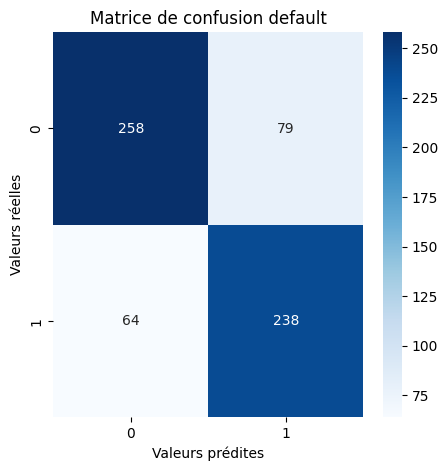

In [103]:
plotcm(y_true=test.pauvre, y_pred=y_pred, mod="default")

In [47]:
y_pred.values

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,

In [ ]:
#test["prediction"] = y_pred.values

In [ ]:
#test["prediction_proba"] = y_proba.values

In [ ]:
#test

,log_hhsize,region,fer_electrique,fer_charbon,bonbonne_gaz,ventilo,voiture,ordinateur,frigo,type_logement,...,sexe,mode_evac_ordure,type_sanitaire,partage_sanitaire,excrement_hors_concess,evac_eau_usees,milieu,pauvre,prediction,prediction_proba
hhid,,,,,,,,,,,,,,,,,,,,,
59812.0,2.484907,14,1,2,1,1,2,1,1,2,...,2,5,2,0,NaN,3,2,0,0,0.114092
59810.0,1.386294,14,1,2,0,0,1,1,1,2,...,1,5,2,0,4,4,2,0,0,0.158621
59711.0,2.397895,14,1,2,0,0,1,1,1,2,...,2,3,2,0,2,4,2,1,1,0.883700
59701.0,2.079442,14,1,1,1,0,1,1,1,2,...,1,3,2,0,2,3,2,0,1,0.765755
59612.0,2.484907,14,1,1,0,0,1,1,1,2,...,1,5,2,0,NaN,3,2,1,1,0.913360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802.0,2.079442,1,1,2,1,0,1,2,2,2,...,2,2,1,0,1,4,2,0,0,0.061810
6713.0,1.791759,1,1,2,1,1,1,1,2,2,...,2,2,1,0,1,1,2,0,0,0.009722
6704.0,1.609438,1,1,2,1,1,1,1,2,1,...,2,2,1,0,1,1,2,0,0,0.018866


In [ ]:
#path_pred = "D:/Shares/DMCI/model_autogluon/model_v1"

In [ ]:
#test.to_csv(path_pred+"/test_pre_rural_avec_proba.csv")

In [51]:
#plotcm(y_true=test.pauvre, y_pred=test.prediction, mod="default")

In [ ]:
#feat_imp = predictor.feature_importance(train)

Computing feature importance via permutation shuffling for 27 features using 2559 rows with 5 shuffle sets...
	227.89s	= Expected runtime (45.58s per shuffle set)
	97.9s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [ ]:
#feat_imp

,importance,stddev,p_value,n,p99_high,p99_low
log_hhsize,0.129504,0.004994,2.647787e-07,5,0.139786,0.119222
tx_promiscuite,0.063697,0.005058,4.729537e-06,5,0.074110,0.053283
region,0.051426,0.006507,3.011911e-05,5,0.064825,0.038028
eclairage,0.034467,0.005195,6.008143e-05,5,0.045162,0.023771
dem_emp_rate,0.032669,0.003230,1.131253e-05,5,0.039319,0.026019
mode_evac_ordure,0.025479,0.001597,1.842266e-06,5,0.028767,0.022191
bonbonne_gaz,0.024541,0.003445,4.537970e-05,5,0.031633,0.017448
ventilo,0.024385,0.003022,2.773346e-05,5,0.030607,0.018162
fer_charbon,0.017429,0.002730,6.992095e-05,5,0.023049,0.011808
materiau_mur,0.013365,0.002399,1.194874e-04,5,0.018305,0.008424


In [54]:
# chercher le meilleur seuil de prédiction

In [55]:
# prediction sur test

In [56]:
# sauvegarder la base test avec les prediction


2024-08-01 13:53:35,655	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2024-08-01 13:53:35,801	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.


## DEPLOEMENT

In [104]:
import pyreadstat

In [105]:
# Replace 'your_file.dta' with the path to your Stata file
df_eleg, meta_eleg = pyreadstat.read_dta("Bases - Projet Ciblage/base_Eleg.dta")

In [106]:
df_eleg.region.value_counts()

region
DIOURBEL       168
SAINT-LOUIS    165
FATICK         158
THIES          121
ZIGUINCHOR     117
TAMBACOUNDA    112
KOLDA          103
KAOLACK         95
DAKAR           87
MATAM           56
KAFFRINE        51
SEDHIOU         51
LOUGA           49
KEDOUGOU        40
Name: count, dtype: int64

In [107]:
reg_dict = {
    "DAKAR": 1,
    "THIES": 7,
    "FATICK": 9,
    "DIOURBEL": 3,
    "KAOLACK": 6,
    "KAFFRINE": 12,
    "TAMBACOUNDA": 5,
    "KEDOUGOU": 13,
    "SAINT-LOUIS": 4,
    "LOUGA": 8,
    "MATAM": 11,
    "SEDHIOU": 14,
    "ZIGUINCHOR": 2,
    "KOLDA": 10
}

In [108]:
# Create a new column 'region_code' by mapping the 'region' column to the 'reg_dict' dictionary
df_eleg['region_code'] = df_eleg['region'].map(reg_dict)

In [109]:
df_eleg['region_code'].value_counts()

region_code
3     168
4     165
9     158
7     121
2     117
5     112
10    103
6      95
1      87
11     56
12     51
14     51
8      49
13     40
Name: count, dtype: int64

In [110]:
# drop the 'region' column and rename the 'region_code' column to 'region'
df_eleg.drop('region', axis=1, inplace=True)
df_eleg.rename(columns={'region_code': 'region'}, inplace=True)

In [112]:
cat_col = ['frigo',
 'sexe',
 'region',
 'type_logement',
 'materiau_mur',
 'nature_sol',
 'ordinateur',
 'source_eau_ss',
 'activ12m',
 'ventilo',
 'evac_eau_usees',
 'voiture',
 'statut_occup',
 'type_sanitaire',
 'materiau_toit',
 'fer_charbon',
 'bonbonne_gaz',
 'eclairage',
 'mode_evac_ordure',
 'fer_electrique',
 'pauvre_eleg']

In [113]:
# convert to categorical data type for columns in 'rg_col'
df_eleg[cat_col] = df_eleg[cat_col].astype('category')

In [114]:
# tab the variable 'pauvre'
df_eleg["pauvre_eleg"].value_counts()

pauvre_eleg
0.0    719
1.0    654
Name: count, dtype: int64

In [115]:
# set "partage_sanitaire" as "object" type
df_eleg['partage_sanitaire'] = df_eleg['partage_sanitaire'].astype('object')

In [ ]:
df_eleg.milieu.value_counts()

In [117]:
# recode 'milieu' 2 : "rural", "1" : "urbain"
df_eleg['milieu'] = df_eleg['milieu'].replace({2: "rural", 1: "urbain"})

In [118]:
# save df_rural and df_urbain
df_rural = df_eleg[df_eleg['milieu'] == "rural"]
df_urbain = df_eleg[df_eleg['milieu'] == "urbain"]

## VALIDATION MODELE SUR BASE RURAL

In [119]:
# transforme df_rural into autogluon tabular data
df_rural = TabularDataset(df_rural)
#df_urbain = TabularDataset(df_urbain)

In [120]:
# rename "pauvre" by "enq_pauvre"
df_rural=df_rural.rename(columns={'pauvre_eleg': 'pauvre'})

In [121]:
predictor_best.evaluate(df_rural)

{'f1': 0.6697416974169742,
 'accuracy': 0.6524271844660194,
 'balanced_accuracy': 0.6521971604526287,
 'mcc': 0.30364907836007765,
 'roc_auc': 0.7028069350483876,
 'precision': 0.6849056603773584,
 'recall': 0.6552346570397112}

10 minute train : {'f1': 0.6697416974169742,
 'accuracy': 0.6524271844660194,
 'balanced_accuracy': 0.6521971604526287,
 'mcc': 0.30364907836007765,
 'roc_auc': 0.7028069350483876,
 'precision': 0.6849056603773584,
 'recall': 0.6552346570397112}

In [122]:
#y_pred = predictor.predict(test)
y_pred = predictor_best.predict(df_rural)

In [123]:
def plotcm(y_true, y_pred, mod, milieu):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Valeurs réelles")
    plt.title(f"Matrice de confusion {mod} {milieu}")
    plt.show()
    plt.savefig(f'{milieu}.png')

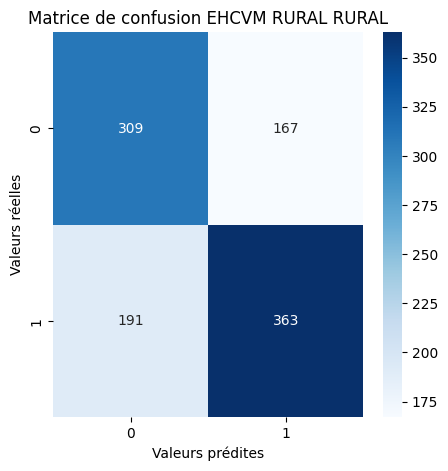

<Figure size 640x480 with 0 Axes>

In [124]:
# make condusion between y_true and y_pred
plotcm(df_rural['pauvre'], y_pred, "EHCVM RURAL", milieu="RURAL")

In [125]:
# ajoute la variable "y_pred" dans le df_rural
df_rural['pauvre_pred_rrl'] = y_pred

In [126]:
y_proba_rrl = predictor_best.predict_proba(df_rural).iloc[:,1]

In [127]:
# ajoute la variable "y_pred" dans le df_rural
df_rural['pauvre_pred_proba_rrl'] = y_proba_rrl

In [128]:
df_rural

,interview__key,interview__id,Departement,Commune,Village,tel,cm,dr,coord,men_id,...,conso_imput_tot,pcexp_eleg,seuil_ehcvm_22,seuil_ehcvm_23,seuil_ehcvm_24,seuil_eleg,pauvre,merge_,pauvre_pred_rrl,pauvre_pred_proba_rrl
0,00-14-07-52,c15e134afa234893a1ffc5589259bcc1,BAMBEY,NDONDOL,H11 SERIGNE MOR NDIAYE,774695252,ABDOU KARIME NDIAYE,031203020008,"14.650025,-16.639478",697688,...,0.0,2.608467e+05,369665.5,391475.75,394607.5625,382769.34375,1.0,3,0,0.209478
1,00-14-91-95,d0982431705c4a69ab91326d7c6f7838,GOSSAS,NDIENE LAGANE,H3 DIOUDY SERERE,763310353,ADAMA POUYE,093202010010,"14.503183,-15.916349",1672629,...,0.0,2.461839e+05,369665.5,391475.75,394607.5625,382769.34375,1.0,3,0,0.218209
3,00-25-76-58,027ab59fc618469fb8f1282c06357ec1,TAMBACOUNDA,NETTEBOULOU,MISSIRAH SARAKHOLE (BABOKE),775833339,MAHAMADOU DIAGOURAGA,052203030025,"13.755761,-13.524305",1054971,...,0.0,9.885166e+04,369665.5,391475.75,394607.5625,382769.34375,1.0,3,1,0.921487
4,00-28-72-81,fe5961007d9a4dedbb4d114050d8d57e,VELINGARA,OUASSADOU,PAYOUNGOU,773655543,MARIAMA MANE,102202010009,"12.718778,-14.065933",1728541,...,0.0,2.279986e+06,369665.5,391475.75,394607.5625,382769.34375,0.0,3,0,0.055918
5,00-41-26-64,3aabb75016834d4389188702d0ed3271,VELINGARA,OUASSADOU,PAYOUNGOU,776535936,MALANG CAMARA,102202010009,"12.713205,-14.066846",1728493,...,0.0,1.097560e+06,369665.5,391475.75,394607.5625,382769.34375,0.0,3,0,0.165209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,99-60-80-50,3829c5bf98f0415dbe2e316bc34a5972,PODOR,MERY,NDIOUGANABE MERY,782439329,PENDA SOW,042201030019,"16.220009,-14.060605",918200,...,0.0,2.693300e+05,369665.5,391475.75,394607.5625,382769.34375,1.0,3,0,0.221463
1368,99-75-33-16,ff1a155c11824b20bbf37b1e40b0e0be,TIVAOUANE,PAMBAL,MBARAGLOU DALY,768529808,EUGENE FAYE,073204050007,"14.973451,-16.892759",1469765,...,0.0,1.009288e+06,369665.5,391475.75,394607.5625,382769.34375,0.0,3,0,0.004198
1370,99-83-18-96,a842f6b0e6e842faab165e3f34fd6c2d,THIES,NOTTO,H1 PEULGA,771108798,MARIAMA SOW,072201010053,"14.733524,-16.935068",1327946,...,0.0,2.754627e+05,369665.5,391475.75,394607.5625,382769.34375,1.0,3,1,0.712456
1371,99-91-11-49,2662c4a4d11648428fe421926b64aa64,SARAYA,SABODALA,H1 MADINA SABODALA,786092765,FILY DANFAKHA,133202030016,"13.159293,-12.127951",1932135,...,0.0,2.436339e+05,369665.5,391475.75,394607.5625,382769.34375,1.0,3,1,0.614968


In [129]:
# save bae rural and urbain
df_rural.to_csv("deploie_gboost/df_rural_apres_prediction.csv", index=False)